# 시계열 예측 문제
- 사인파형 시계열을 입력으로 다음 스텝의 출력을 예측
- 3개의 순서열을 입력한 후 출력값이 target과 일치하게 만듦

In [1]:
import numpy as np 
import matplotlib.pyplot as plt
%matplotlib inline

In [8]:
s = np.sin(2 * np.pi * 0.125 * np.arange(20))
s

array([ 0.00000000e+00,  7.07106781e-01,  1.00000000e+00,  7.07106781e-01,
        1.22464680e-16, -7.07106781e-01, -1.00000000e+00, -7.07106781e-01,
       -2.44929360e-16,  7.07106781e-01,  1.00000000e+00,  7.07106781e-01,
        3.67394040e-16, -7.07106781e-01, -1.00000000e+00, -7.07106781e-01,
       -4.89858720e-16,  7.07106781e-01,  1.00000000e+00,  7.07106781e-01])

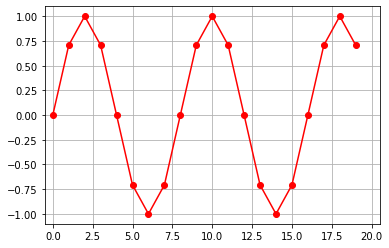

In [9]:
plt.plot(s, 'ro-')
plt.xlim(-0.5, 20.5)
plt.ylim(-1.1, 1.1)
plt.grid()
plt.show()

### 원래의 시계열 벡터를 Toep 행렬 형태로 변환
(대각선 위의 성분들이 같은 정사각 행렬)

In [10]:
from scipy.linalg import toeplitz
S = np.fliplr(toeplitz(np.r_[s[-1], np.zeros(s.shape[0]-2)], s[::-1]))
S[:5, :3]

array([[ 0.00000000e+00,  7.07106781e-01,  1.00000000e+00],
       [ 7.07106781e-01,  1.00000000e+00,  7.07106781e-01],
       [ 1.00000000e+00,  7.07106781e-01,  1.22464680e-16],
       [ 7.07106781e-01,  1.22464680e-16, -7.07106781e-01],
       [ 1.22464680e-16, -7.07106781e-01, -1.00000000e+00]])

In [12]:
S.shape

(19, 20)

In [13]:
X_train = S[:-1, :3][:, :, np.newaxis]
Y_train = S[:-1, 3]
X_train.shape, Y_train.shape

((18, 3, 1), (18,))

In [14]:
X_train[:3]

array([[[0.00000000e+00],
        [7.07106781e-01],
        [1.00000000e+00]],

       [[7.07106781e-01],
        [1.00000000e+00],
        [7.07106781e-01]],

       [[1.00000000e+00],
        [7.07106781e-01],
        [1.22464680e-16]]])

In [15]:
Y_train[:3]

array([ 7.07106781e-01,  1.22464680e-16, -7.07106781e-01])

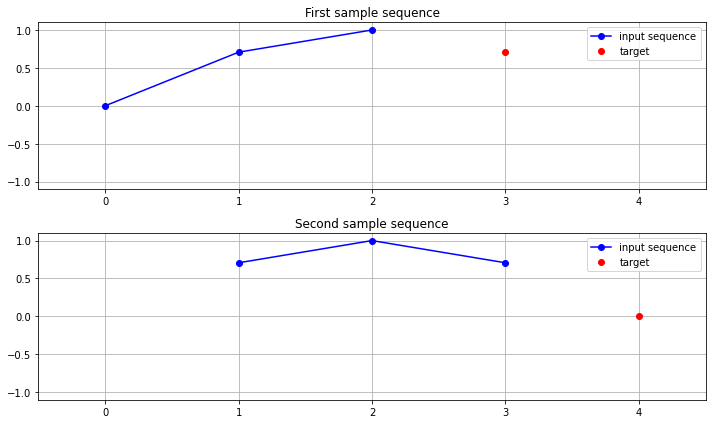

In [16]:
plt.figure(figsize=(10,6))

plt.subplot(211)
plt.plot([0, 1, 2], X_train[0].flatten(), 'bo-', label="input sequence")
plt.plot([3], Y_train[0], 'ro', label="target")
plt.xlim(-0.5, 4.5)
plt.ylim(-1.1, 1.1)
plt.legend()
plt.grid()
plt.title("First sample sequence")

plt.subplot(212)
plt.plot([1, 2, 3], X_train[1].flatten(), 'bo-', label="input sequence")
plt.plot([4], Y_train[1], 'ro', label="target")
plt.xlim(-0.5, 4.5)
plt.ylim(-1.1, 1.1)
plt.legend()
plt.grid()
plt.title("Second sample sequence")

plt.tight_layout()
plt.show()

In [17]:
import tensorflow as tf

seed = 2021
np.random.seed(seed)
tf.random.set_seed(seed)

In [19]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, SimpleRNN

In [21]:
model = Sequential()
model.add(SimpleRNN(10, input_shape=(3,1)))   #X_train.shape[1:]
model.add(Dense(1, activation='linear'))
model.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
simple_rnn_1 (SimpleRNN)     (None, 10)                120       
_________________________________________________________________
dense (Dense)                (None, 1)                 11        
Total params: 131
Trainable params: 131
Non-trainable params: 0
_________________________________________________________________


In [23]:
# 모델설정
model.compile(loss='mse', optimizer='sgd')

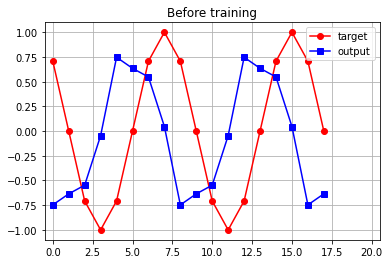

In [26]:
plt.plot(Y_train, 'ro-', label="target")
plt.plot(model.predict(X_train[:, :, :]), 'bs-', label="output")
plt.xlim(-0.5, 20.5)
plt.ylim(-1.1, 1.1)
plt.legend()
plt.title("Before training")
plt.grid()
plt.show()

In [28]:
# 모델 학습
history = model.fit(X_train, Y_train, epochs=100)

Epoch 1/100
1/1 [==============================] - 1s 788ms/step - loss: 0.9072
Epoch 2/100
1/1 [==============================] - 0s 13ms/step - loss: 0.8125
Epoch 3/100
1/1 [==============================] - 0s 4ms/step - loss: 0.7304
Epoch 4/100
1/1 [==============================] - 0s 9ms/step - loss: 0.6589
Epoch 5/100
1/1 [==============================] - 0s 8ms/step - loss: 0.5963
Epoch 6/100
1/1 [==============================] - 0s 6ms/step - loss: 0.5413
Epoch 7/100
1/1 [==============================] - 0s 10ms/step - loss: 0.4926
Epoch 8/100
1/1 [==============================] - 0s 5ms/step - loss: 0.4495
Epoch 9/100
1/1 [==============================] - 0s 6ms/step - loss: 0.4110
Epoch 10/100
1/1 [==============================] - 0s 6ms/step - loss: 0.3767
Epoch 11/100
1/1 [==============================] - 0s 6ms/step - loss: 0.3458
Epoch 12/100
1/1 [==============================] - 0s 7ms/step - loss: 0.3181
Epoch 13/100
1/1 [==============================] - 0s 6m

결과확인

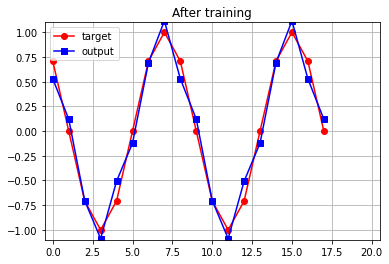

In [30]:
plt.plot(Y_train, 'ro-', label="target")
plt.plot(model.predict(X_train[:, :, :]), 'bs-', label="output")
plt.xlim(-0.5, 20.5)
plt.ylim(-1.1, 1.1)
plt.legend()
plt.title("After training")
plt.grid()
plt.show()

### RNN node 갯수를 20개로

In [31]:
model2 = Sequential()
model2.add(SimpleRNN(10, input_shape=(3,1)))   #X_train.shape[1:]
model2.add(Dense(1, activation='linear'))
model2.summary()

Model: "sequential_2"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
simple_rnn_2 (SimpleRNN)     (None, 10)                120       
_________________________________________________________________
dense_1 (Dense)              (None, 1)                 11        
Total params: 131
Trainable params: 131
Non-trainable params: 0
_________________________________________________________________


In [32]:
model2.compile(loss='mse', optimizer='sgd')

In [36]:
model2.fit(X_train, Y_train, epochs=200)

Epoch 1/200
1/1 [==============================] - 0s 6ms/step - loss: 0.0042
Epoch 2/200
1/1 [==============================] - 0s 5ms/step - loss: 0.0039
Epoch 3/200
1/1 [==============================] - 0s 8ms/step - loss: 0.0037
Epoch 4/200
1/1 [==============================] - 0s 5ms/step - loss: 0.0035
Epoch 5/200
1/1 [==============================] - 0s 10ms/step - loss: 0.0033
Epoch 6/200
1/1 [==============================] - 0s 11ms/step - loss: 0.0031
Epoch 7/200
1/1 [==============================] - 0s 6ms/step - loss: 0.0029
Epoch 8/200
1/1 [==============================] - 0s 8ms/step - loss: 0.0028
Epoch 9/200
1/1 [==============================] - 0s 9ms/step - loss: 0.0026
Epoch 10/200
1/1 [==============================] - 0s 5ms/step - loss: 0.0025
Epoch 11/200
1/1 [==============================] - 0s 5ms/step - loss: 0.0024
Epoch 12/200
1/1 [==============================] - 0s 6ms/step - loss: 0.0022
Epoch 13/200
1/1 [==============================] - 0s 6ms/

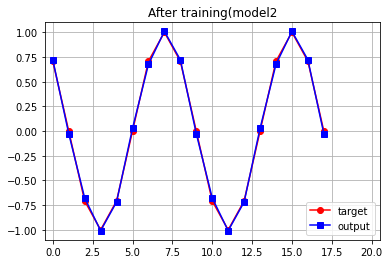

In [37]:
plt.plot(Y_train, 'ro-', label="target")
plt.plot(model2.predict(X_train[:, :, :]), 'bs-', label="output")
plt.xlim(-0.5, 20.5)
plt.ylim(-1.1, 1.1)
plt.legend()
plt.title("After training(model2")
plt.grid()
plt.show()